앞 절의 예에서는 $x_0과\ x_1$의 편미분을 변수별로 따로 계산했습니다. 그럼 $x_0과\ x_1$의 편미분을 동시에 계산하고 싶다면, 
$
\begin{pmatrix}
{\partial f \over \partial x_0} &
{\partial f \over \partial x_1}
\end{pmatrix}
$
처럼 모든 변수의 편미분을 벡터로 정리하여 표현하면 된다.<br>
이를 "그래디언트(Gradient)"라고 한다. 그리고 그래디언트는 다음과 같이 표현할 수 있다.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, x):

    h = 1e-4

    if x.ndim == 1:
        x = x.reshape(1, x.size)

    # h = np.zeros((x.shape))
    grd = np.zeros((x.shape))

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp = x[i,j]

            x[i,j] = tmp + h
            fxh1 = f(x)

            x[i,j] = tmp - h
            fxh2 = f(x)

            grd[i,j] += (fxh1 - fxh2) / (2*h)
            x[i,j] = tmp

    return grd

In [17]:
def function_1(x):
    return np.sum(x**2)

In [50]:
numerical_gradient(function_1, np.array([3, 4]))

array([[25000., 35000.]])

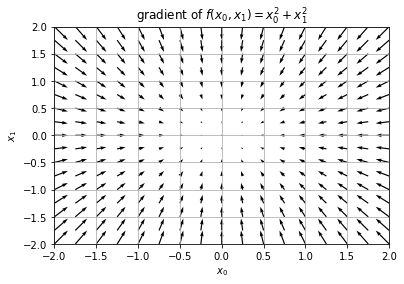

In [4]:
x, y = np.mgrid[-2:2.25:0.25, -2:2.25:0.25]
x = x.flatten()
y = y.flatten()
xy = np.vstack((x, y))
gradient = np.zeros((xy.shape))

for i in range(xy.shape[1]):
    gradient[:,i] = numerical_gradient(function_1, xy[:,i])

plt.quiver(x, y, -gradient[0,:], -gradient[1,:])
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.title("gradient of $f(x_0, x_1) = x_0^2 + x_1^2$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.grid()
plt.show()

# 4.4.1 경사법(경사 하강법)

기계학습의 문제 대부분은 학습단계에서 최적의 매개변수를 찾아낸다. 신경망 역시 최적의 매개변수를 찾아야 한다. 여기에서 최적이란 손실 함수가 최솟값을 가질 때의 매개변수이다. 그러나 일반적인 경우에는 손실 함수는 매우 복잡하다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.

여기서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 점이다. 복잡한 함수에서는 "안장점"이라는 기울기가 0이지만 극값이 아닌 점이 존재한다. 그러나 기울어진 방향으로 가야 함수의 값을 줄일 수 있다. 따라서 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다.

경사법은 현 위치에서 기울어진 방향을 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법이다. 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망 학습에는 경사법을 많이 사용한다.

경사법을 수식으로 나타내면 다음과 같다.

$
x_0 = x_0 - \eta{\partial f \over \partial x_0} \\
x_1 = x_1 - \eta{\partial f \over \partial x_1}
\qquad$ [식 4.7]

[식 4.7]의 $\eta$기호는 갱신하는 양을 나타낸다. 이를 신경망에서는 "학습률(Learning Rate)"라고 한다. [식 4.7]은 1회에 해당하는 갱신이고, 이 단계를 반복하며 학습한다. 변수가 3개 이상으로 늘어나더라도 방식은 동일하다. 또한, 학습률의 값은 미리 특정 값으로 정해두어야 하는데, 일반적으로 너무 크거나 작으면 "좋은 장소"를 찾아갈 수 없다.<br>
경사하강법을 구현해보자.

In [45]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    
    x = init_x
    
    for i in range(step_num):
        grd = numerical_gradient(f, x)
        x -= lr * grd
    
    return x

인수 f는 최적화 하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻한다.

예제를 한번 풀어보자.

In [46]:
x = np.array([-3.0, 4.0])
x = x.reshape(1, x.size)
gradient_descent(function_1, x, 0.1, 100)

array([[-6.11110793e-10,  8.14814391e-10]])

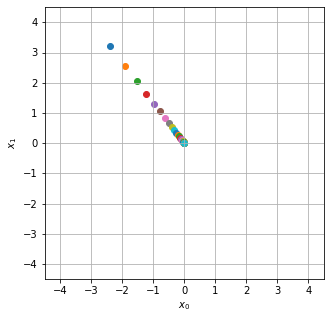

In [47]:
init_x = np.array([-3.0, 4.0])
init_x = init_x.reshape(1, init_x.size)

plt.figure(figsize=(5,5))
for i in range(100):
    x = gradient_descent(function_1, init_x, 0.1, 1)
    plt.scatter(x[0,0], x[0,1])

plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.grid()
plt.show()

In [48]:
x = np.array([[-3.0, 4.0]])
print(gradient_descent(function_1, x, 10.0, 100))

x = np.array([[-3.0, 4.0]])
print(gradient_descent(function_1, x, 1e-10, 100))

[[-2.58983747e+13 -1.29524862e+12]]
[[-2.99999994  3.99999992]]


이처럼 학습률이 너무 크거나 작으면 발산되거나 갱신되지 않고 학습이 끝나게 된다.

# 4.4.2 신경망에서의 기울기

신경망 학습에서도 기울기를 구해야 한다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다. 예를 들어 형상이 $2 \times 3$, 가중치가 $W$, 손실 함수가 $L$인 신경망을 생각해보자. 이 경우 경사는 ${\partial L \over \partial W}$로 나타낼 수 있다. 수식으로는 다음과 같다.

$
W = 
\begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{pmatrix} \\
{\partial L \over \partial W} = 
\begin{pmatrix}
{\partial L \over \partial w_{11}} &
{\partial L \over \partial w_{12}} &
{\partial L \over \partial w_{13}} \\
{\partial L \over \partial w_{21}} &
{\partial L \over \partial w_{22}} &
{\partial L \over \partial w_{23}} 
\end{pmatrix}
\qquad$ [식 4.8]

여기서 중요한 점은 $W$의 형상과 ${\partial L \over \partial W}$의 형상이 같다는 사실이다. <br>
그럼 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보자.<br>
먼저 simpleNet 클래스를 살펴보자.

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from functions import Function

F = Function()

class simpleNet:
    def __init__(self, W):
        self.W = W # np.random.randn(2,3)
        
    def predict(self, x):
        return x@self.W
    
    def loss(self, x, t):
        z = self.predict(x)
        y = F.softmax(z)
        loss = F.cross_entropy_error(y, t)
        
        return loss

우선 init을 통해 가중치를 초기화하고, predict에서 입력값과 가중치를 곱해 활성화 함수에 넣기 전 출력값을 만들어내고, loss 함수에서 활성화 함수로 softmax 함수를 사용한다. 마지막으로 교차 엔트로피 오차 방법을 이용해 오차를 구하여 출력한다.

In [43]:
W = np.array([[0.47355232, 0.9977393, 0.84668094], [0.85557411, 0.03563661, 0.69422093]])
net = simpleNet(W)
x = np.array([0.6, 0.9])
p = net.predict(x)
t = np.array([0, 0, 0])
t[np.argmax(p)] += 1

print(net.loss(x, t))

0.9280682857864077


In [42]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.21924757  0.14356243 -0.36281   ]
 [ 0.32887136  0.21534364 -0.544215  ]]


In [44]:
f = lambda W: net.loss(x, t)
print(numerical_gradient(f, net.W))

[[ 0.21924757  0.14356243 -0.36281   ]
 [ 0.32887136  0.21534364 -0.544215  ]]
